<h1 style="color:blue">Générateur numérique

Le générateur de données numérique permet de générer des données sous forme de fonction sinusoïdale

<h2 style="color:orange">Simulation a l'aide d'une simple fonction

<h3 style="color:green">Géneration de la formule

In [1]:
from formule_mono_periode import FormuleMonoPeriode
from formule import Formule
periode = 20 #20 secondes
amplitude = 1
formule = Formule("Formule 1")
formule.ajouter_monoperiode(FormuleMonoPeriode(periode,amplitude))

<h3 style="color:green">Calcul de la formule

In [2]:
from controleur import Controleur

nombre_echantillon = 100
periode = 1 #1 seconde

controleur = Controleur(nombre_echantillon,periode)
controleur.ajouter_formule(formule)
controleur.calcul()

<h4 style="color:SkyBlue">Résultat : Tableau

In [3]:
controleur.data_frame.head(10)

,Formule 1
17:26:05 2022/03/29,0.000000
17:26:06 2022/03/29,0.309017
17:26:07 2022/03/29,0.587785
17:26:08 2022/03/29,0.809017
17:26:09 2022/03/29,0.951057
17:26:10 2022/03/29,1.000000
17:26:11 2022/03/29,0.951057
17:26:12 2022/03/29,0.809017
17:26:13 2022/03/29,0.587785
17:26:14 2022/03/29,0.309017


<h4 style="color:SkyBlue">Résultat : Graphique

<AxesSubplot:>

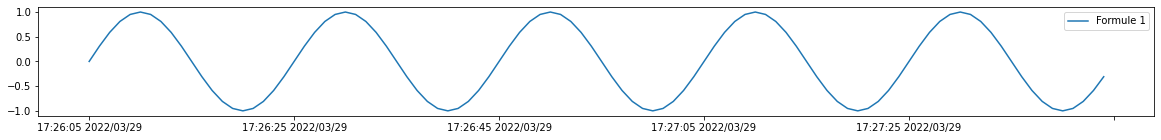

In [4]:
controleur.data_frame.plot(figsize=[20,2])

<h2 style="color:orange">Simulation a l'aide de bruit

<h3 style="color:green">Géneration de la formule

In [6]:
from formule_mono_periode import FormuleMonoPeriode
from formule_bruit import FormuleBruit
from formule import Formule
periode = 20 #20 secondes
amplitude = 1
bruit = 1

formule = Formule("Formule sans bruit")
formule.ajouter_monoperiode(FormuleMonoPeriode(periode,amplitude))

formule_bruit = Formule("Formule avec bruit")
formule_bruit.ajouter_monoperiode(FormuleMonoPeriode(periode,amplitude))
formule_bruit.ajouter_monoperiode(FormuleBruit(bruit))

<h3 style="color:green">Calcul de la formule

In [7]:
from controleur import Controleur

nombre_echantillon = 100
periode = 1 #1 seconde

controleur = Controleur(nombre_echantillon,periode)
controleur.ajouter_formule(formule)
controleur.ajouter_formule(formule_bruit)
controleur.calcul()

<h4 style="color:SkyBlue">Résultat : Tableau

In [8]:
controleur.data_frame.head(10)

,Formule sans bruit,Formule avec bruit
18:00:36 2022/04/01,0.000000,-0.314148
18:00:37 2022/04/01,0.309017,0.290011
18:00:38 2022/04/01,0.587785,0.135931
18:00:39 2022/04/01,0.809017,1.242661
18:00:40 2022/04/01,0.951057,1.068232
18:00:41 2022/04/01,1.000000,1.123295
18:00:42 2022/04/01,0.951057,0.914985
18:00:43 2022/04/01,0.809017,1.113083
18:00:44 2022/04/01,0.587785,0.869145
18:00:45 2022/04/01,0.309017,-0.070536


<h4 style="color:SkyBlue">Résultat : Graphique

<AxesSubplot:>

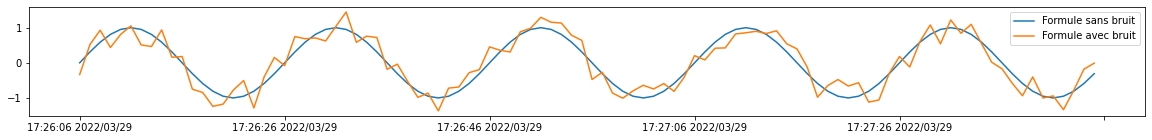

In [8]:
controleur.data_frame.plot(figsize=[20,2])

<h2 style="color:orange">Simulation a l'aide de somme de fonction

Dans cette exemple nous voulons simuler un capteur de température ayant une température moyenne à 25°C et avec une amplitude de 5°C

<h3 style="color:green">Calcul des formules

Pour cela il faut 3 formules
<ul>
    <li>Une formule période de 1 journée et d'amplitude 5</li>
    <li>Une formule ayant une periode nulle et une amplitude de 25</li>
    <li>Une formule de bruit</li>
</ul>


In [5]:
from formule_mono_periode import FormuleMonoPeriode
from formule import Formule
from formule_bruit import FormuleBruit
from controleur import Controleur
formule_periodique = FormuleMonoPeriode(3600*24,5)
formule_periodique_nulle = FormuleMonoPeriode(0,25)
formule_bruit = FormuleBruit(1)

formule_temperature = Formule("Temperature")

nombre_echantillon = 144
periode = 3600 #1 heure
formule_temperature.ajouter_monoperiode(formule_periodique)
formule_temperature.ajouter_monoperiode(formule_periodique_nulle)
formule_temperature.ajouter_monoperiode(formule_bruit)

controleur = Controleur(nombre_echantillon,periode)
controleur.ajouter_formule(formule_temperature)
controleur.calcul()


TypeError: __init__() takes from 1 to 3 positional arguments but 4 were given

<h4 style="color:SkyBlue">Résultat : Tableau

In [4]:
controleur.data_frame.head(10)

,Formule sans bruit,Formule avec bruit
17:58:06 2022/04/01,0.000000,-0.282131
17:58:07 2022/04/01,0.309017,0.367980
17:58:08 2022/04/01,0.587785,1.063460
17:58:09 2022/04/01,0.809017,0.898425
17:58:10 2022/04/01,0.951057,1.249610
17:58:11 2022/04/01,1.000000,0.933544
17:58:12 2022/04/01,0.951057,0.685652
17:58:13 2022/04/01,0.809017,1.223976
17:58:14 2022/04/01,0.587785,0.934767
17:58:15 2022/04/01,0.309017,0.054399


<h4 style="color:SkyBlue">Résultat : Graphique

<AxesSubplot:>

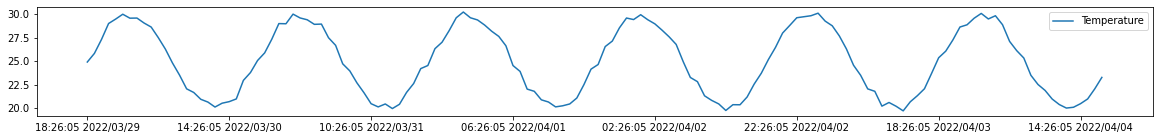

In [11]:
controleur.data_frame.plot(figsize=[20,2])